<a href="https://colab.research.google.com/github/sillHD/CuadernosSyS/blob/main/PrimerCorte3/Ejercicios_de_Operaciones_de_se%C3%B1ales_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones básicas sobre señales

Las operaciones como la superposición, el cambio temporal y el escalamiento, se utilizan para construir señales con una estructura más compleja.

Se introduce un conjunto de operaciones elementales que se utilizan frecuentemente en el procesamiento de señales.

### Superposición

La superposición $x(t)$ de dos señales $x_1(t)$ and $x_2(t)$ está dada por:

\begin{equation}
x(t) = A \cdot x_1(t) + B \cdot x_2(t)
\end{equation}

con los pesos complejos $A, B \in \mathbb{C}$.

**Ejemplo**

El siguiente ejemplo ilustra la superposición de dos señales armónicas $x(t) = A \cdot \cos(\omega_1 t) + B \cdot \cos(\omega_2 t)$ con pesos $A$, $B$ y frecuencia angular $\omega_1$ y $\omega_2$.

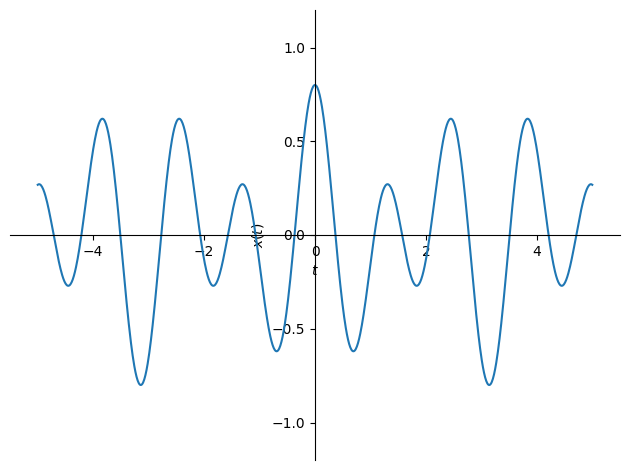

In [3]:
%matplotlib inline
import sympy as sym

t = sym.symbols('t', real=True)#se declara la variable simbólica t

#parámetros de las funciones cos
A = .3
om1 = 3
B = .5
om2 = 5

#operación superposición en sympy
x = A*sym.cos(om1*t) + B*sym.cos(om2*t)
#se grafica la señal resultante
sym.plot(x, (t,-5,5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');


### Desplazamiento temporal

El desplazamiento temporal de una señal $s(t)$ en un instante de tiempo $\tau$ es una operación frecuentemente aplicada en el procesamiento de señales. Por ejemplo, para modelar la propagación de señales desde un actuador a un sensor.

El desplazamiento de la señal $x(t)$ está definido como:

\begin{equation}
x(t) = s(t-\tau)
\end{equation}

con $\tau \in \mathbb{R}$. La señal $s(t)$ es:

* desplazada hacia la derecha (*retrasada*) para $\tau > 0$
* desplazada hacia la izquierda para $\tau < 0$

**Ejemplo**

Para ilustrar el cambio temporal de señales, la construcción de una señal escalera por una superposición de desplazamiento se define como:

\begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}



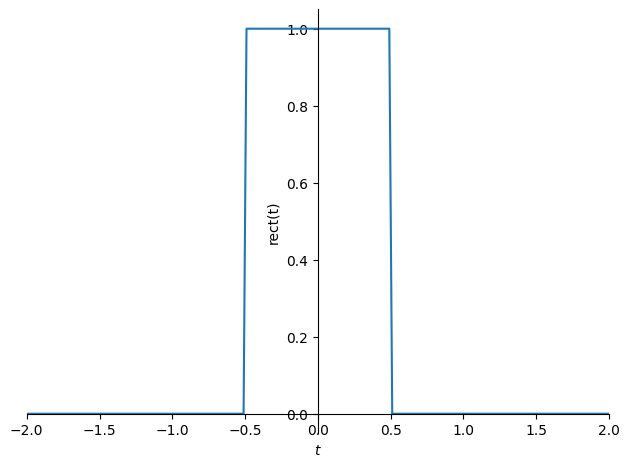

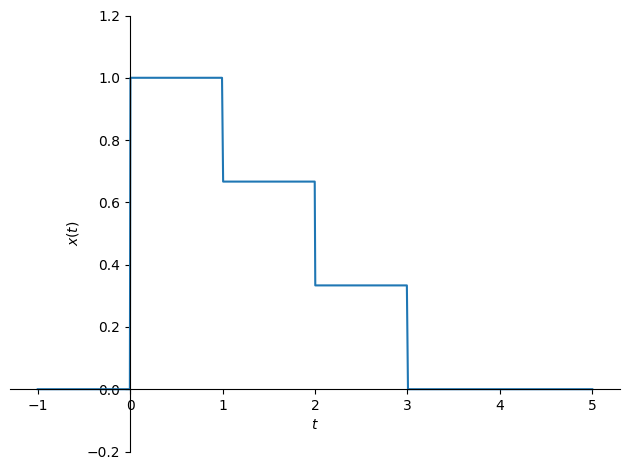

In [5]:
rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)
sym.plot(rect, xlim=[-2,2], ylabel = r'rect(t)')
#los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

**Ejercicio**

* Agregar otro escalón al principio de la señal escalera modificando el ejemplo anterior.

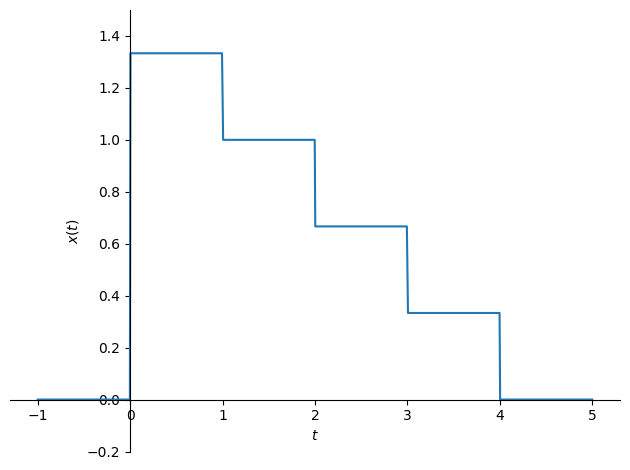

In [14]:
x = 4/3*rect.subs(t, t-1/2) + 1*rect.subs(t, t-3/2) + 2/3*rect.subs(t, t-5/2)+ 1/3*rect.subs(t, t-7/2)
sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.5], ylabel='$x(t)$');

El código define una función x que representa una señal en forma de escalera. Esta escalera se construye sumando varias versiones desplazadas y escaladas de una función rectangular básica (rect). Cada término de la suma representa un escalón de la escalera, con su altura y posición determinadas por los coeficientes (4/3, 1, 2/3, 1/3) y los desplazamientos (t-1/2, t-3/2, t-5/2, t-7/2). Finalmente, el código utiliza sym.plot para graficar esta señal en un rango de tiempo específico. En resumen, el código genera y visualiza una señal en forma de escalera.

### Escalamiento temporal

El escalamiento temporal de una señal $s(t)$ está definido como:

\begin{equation}
x(t) = s(a \cdot t)
\end{equation}

con $a \in \mathbb{R}$. La señal $s(t)$ es

* estirada para $0 < a < 1$
* comprimida $a > 1$
* invertida y escalada para $a < 0$

Una aplicación de escalado temporal en el procesamiento de la señal es la escala de las señales estándar y el modelado del [efecto Doppler](https://en.wikipedia.org/wiki/Doppler_effect).

**Ejemplo**

El siguiente ejemplo ilustra el escalamiento de una señal escalera $y(t) = x(a \cdot t)$.

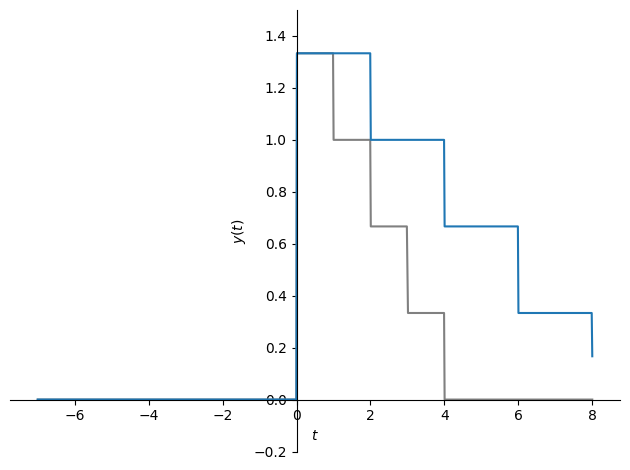

In [20]:
a = sym.symbols('a', real=True)
y = x.subs(t, a*t)

px = sym.plot(x, (t, -7, 8), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False, line_color='gray')
py = sym.plot(y.subs(a,1/2), (t, -7, 8), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False)
px.extend(py)#se extiende los gráficos sobre una misma figura
px.show()

**Ejercicio**

* Modifique el ejemplo anterior para que la señal se comprima.
* Modifique el ejemplo anterior para que la señal se escale y se invierta. ¿Qué factor de escala `a`da como resultado un       estiramiento/compresión en este contexto?  


## Primer Punto





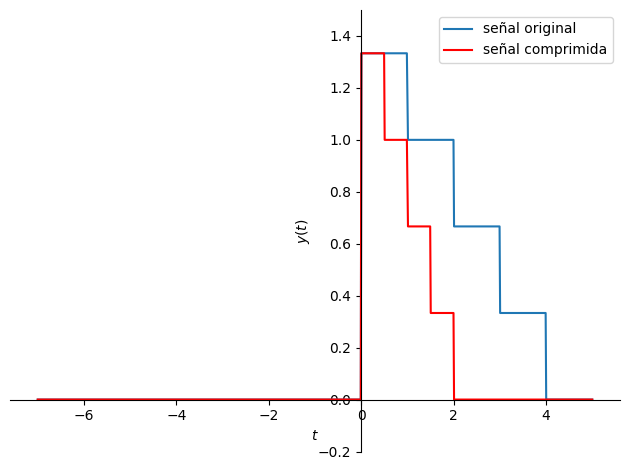

In [33]:

p_original = sym.plot(x, (t, -7, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,label = "señal original")
p_compresed = sym.plot(y.subs(a,2), (t, -7, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,line_color = 'red',label = "señal comprimida")
p_original.extend(p_compresed)#se extiende los gráficos sobre una misma figura
p_original.legend = True
p_original.show()

Este fragmento de código en Python, utilizando la librería sympy, se enfoca en la visualización de una señal original y su versión comprimida. Define una señal original x (que se asume definida previamente) y la grafica con sym.plot, etiquetándola como "señal original". Luego, define una señal comprimida y aplicando un factor de escala (a=2) a la señal original y la grafica en el mismo gráfico, pero en color rojo y etiquetada como "señal comprimida". Finalmente, activa la leyenda del gráfico para identificar las dos señales y muestra el gráfico resultante con p_original.show(). En resumen, el código busca ilustrar el efecto de la compresión en una señal.

## Segundo Punto





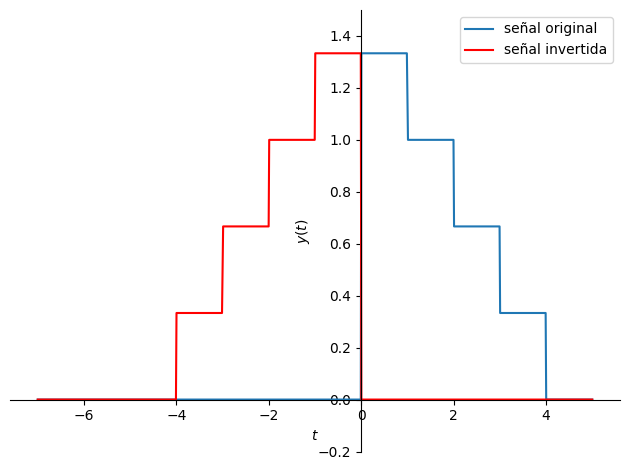

In [44]:
p_original = sym.plot(x, (t, -7, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,label = "señal original")
p_inverted = sym.plot(y.subs(a,-1), (t, -7, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,line_color = 'red',label = "señal invertida")
p_original.extend(p_compresed)
p_original.legend = True
p_original.show()

Este fragmento de código utiliza la biblioteca sympy de Python para visualizar una señal original y su versión invertida temporalmente. Primero, se define y grafica la señal original x, etiquetándola como "señal original". Luego, se crea una señal invertida y sustituyendo el factor de escala temporal a con -1, lo que efectivamente refleja la señal a través del eje vertical. Esta señal invertida se grafica en rojo y se etiqueta como "señal invertida". Finalmente, ambas señales se muestran en un mismo gráfico con una leyenda para una fácil comparación, ilustrando el efecto de la inversión temporal en la señal.

Para este si de deseamos que la señal se invierta y ademas se estire o se comprima deberemos adecuarnos a los siguientes rangos

## Señal invertida y alargada

invertida y estirada para $-0 < a < -1$

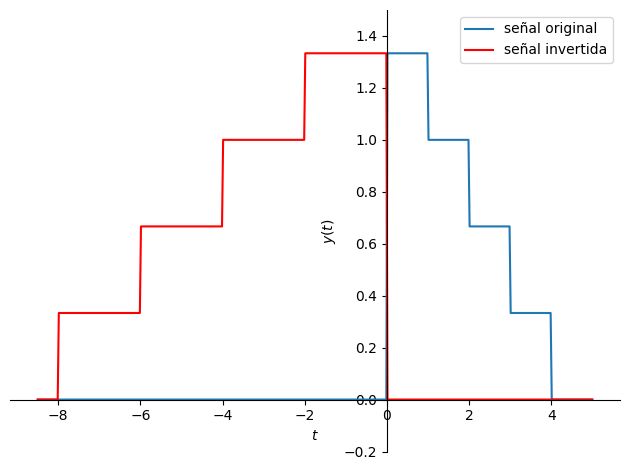

In [40]:
p_original = sym.plot(x, (t, -8.5, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,label = "señal original")
p_inverted = sym.plot(y.subs(a,-1/2), (t, -8.5, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,line_color = 'red',label = "señal invertida y alargada")
p_original.extend(p_compresed)
p_original.legend = True
p_original.show()

## Señal invertida y alargada

invertida y comprimida para $a < -1$

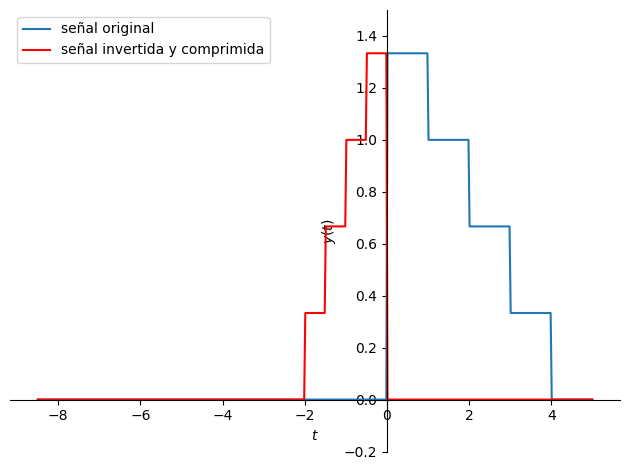

In [45]:
p_original = sym.plot(x, (t, -8.5, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,label = "señal original")
p_inverted = sym.plot(y.subs(a,-2), (t, -8.5, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,line_color = 'red',label = "señal invertida y comprimida")
p_original.extend(p_compresed)
p_original.legend = True
p_original.show()

### Desplazamiento Temporal

El desplazamiento temporal de una señal $s(t)$ está definido como

\begin{equation}
x(t) = s(\tau - t)
\end{equation}

para $\tau \in \mathbb{R}$. Como $s(\tau - t) = s(- (t - \tau))$ la operación espejo también se puede representar como una inversión temporal de la señal $s(t)$ seguida por un desplazamiento de $\tau$ de la señal invertida. Para $\tau = 0$ este resultado es solo una inversión temporal de la señal.

La operación de cambio temporal puede interpretarse geométricamente como un reflejo de la señal $s(t)$ en el eje vertical $t=\frac{\tau}{2}$.

**Ejemplo**

El siguiente ejemplo ilustra el cambio temporal $y(t) = x(\tau - t)$ de la señal escalera $x(t)$ anteriormente introducida.

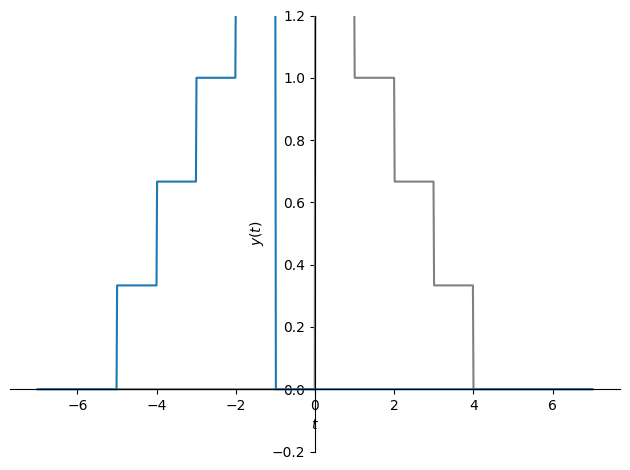

In [49]:
tau =-1
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

**Ejercicio**

* Para que valor de $\tau$, ¿la señal comienza en $t=0$?
* Realice un cambio temporal dividiendo en dos operaciones consecutivas: (i) Inversión temporal y (ii) Desplazamiento temporal.

## Primer Punto

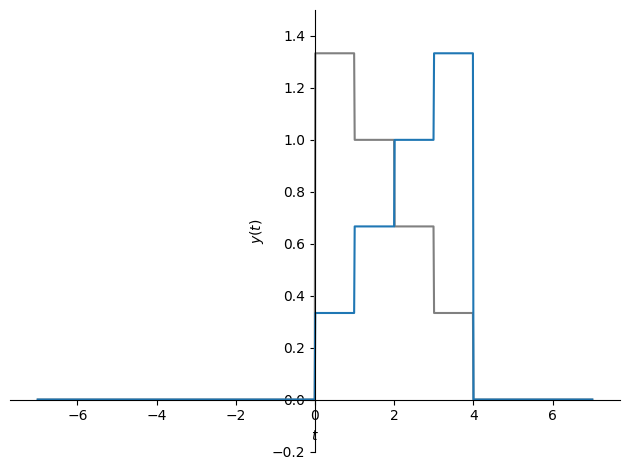

In [51]:
tau =4
y = x.subs(t, tau - t)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', line_color='gray', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False)
px.extend(py)
px.show()

Para que la señal comience en t=0 después de aplicar el cambio temporal y(t) = x(τ - t), el valor de τ debe ser igual a la posición inicial de la señal original x(t) en el eje del tiempo.

## Segundo punto


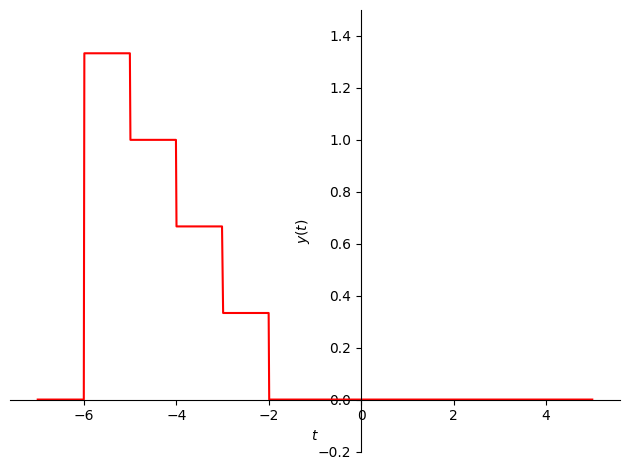

In [95]:

y = x.subs(t,a*t)  # Primera operacion (Inversion temporal)
a = sym.symbols('a', real=True)
a = -1
y = y.subs(a*t, tau - a*t)  # Segunda operacion (Desplazamiento Temporal)
tau = 6
p_compresed = sym.plot(y, (t, -7, 5), ylim=[-0.2, 1.5], ylabel=r'$y(t)$', show=False,line_color = 'red',label = "señal invertida")
p_compresed.show()

El código implementa un cambio temporal sobre una señal x en dos etapas: primero, realiza una inversión temporal sustituyendo t por a*t donde a es un símbolo que luego se define como -1, invirtiendo efectivamente la señal. En la segunda etapa, aplica un desplazamiento temporal reemplazando a*t por tau - a*t con tau definido como 4, desplazando la señal invertida 4 unidades.

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.